In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('sales_prediction.csv')

In [3]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
X=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']
SEED=42

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=SEED)

x_train.shape, x_test.shape

((5966, 11), (2557, 11))

In [6]:
y_train.head()

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
Name: Item_Outlet_Sales, dtype: float64

# Understanding Data

In [7]:
x_train_c=x_train.copy()

In [8]:
x_train_c.shape

(5966, 11)

In [9]:
x_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
num_data=x_train_c.select_dtypes(exclude=['object'])

In [11]:
num_data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4943.000000      5966.000000  5966.000000                5966.000000
mean     12.937193         0.065821   141.814242                1997.867248
std       4.630433         0.051093    62.627609                   8.385023
min       4.555000         0.000000    31.290000                1985.000000
25%       8.895000         0.026982    94.144250                1987.000000
50%      12.650000         0.053923   143.879900                1999.000000
75%      17.000000         0.094350   186.621400                2004.000000
max      21.350000         0.328391   266.888400                2009.000000

In [12]:
def visualize(dataframe,col_name):
    fig,ax= plt.subplots(1,2, figsize=(12,5))

    sns.histplot(data=dataframe, x=col_name, ax=ax[0])
    sns.boxplot(data=dataframe, y=col_name, ax=ax[1])

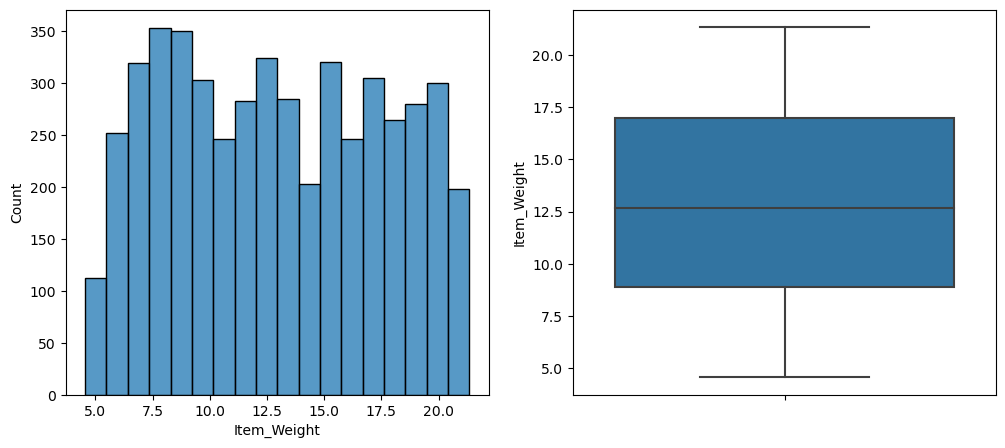

In [13]:
visualize(num_data,'Item_Weight')

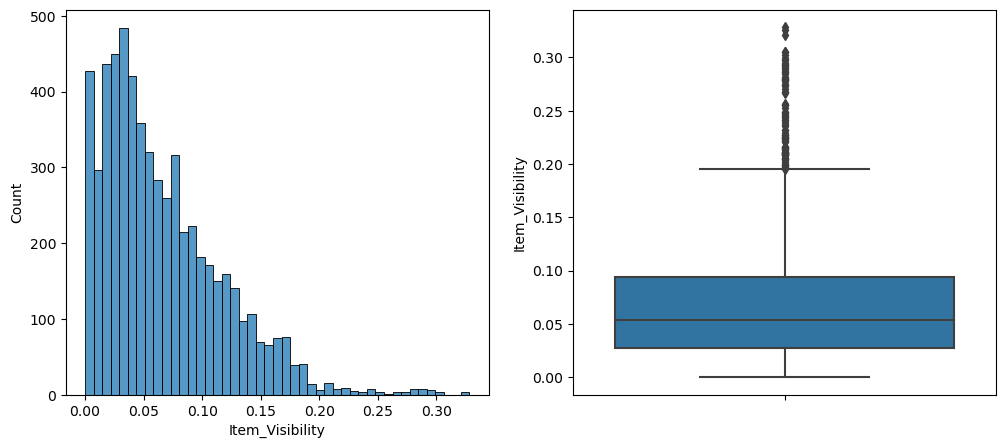

In [14]:
visualize(num_data,'Item_Visibility')

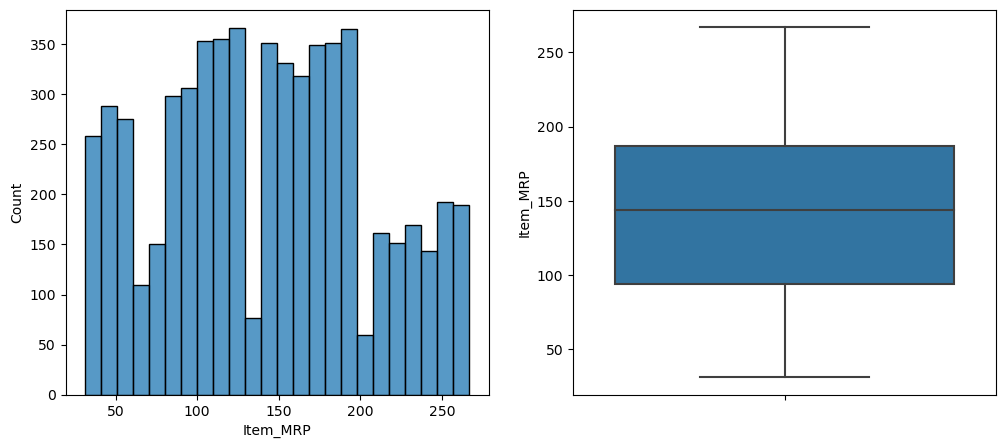

In [15]:
visualize(num_data,'Item_MRP')

<AxesSubplot: xlabel='Outlet_Establishment_Year', ylabel='count'>

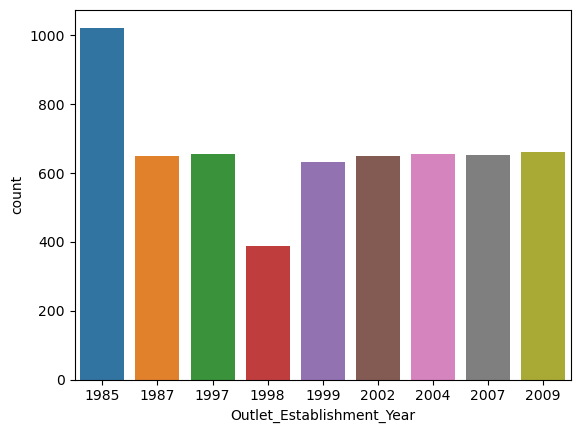

In [16]:
sns.countplot(data=x_train_c, x='Outlet_Establishment_Year')

In [17]:
cat_data=x_train_c.select_dtypes(include=['object'])
cat_data.head()

Item_Identifier Item_Fat_Content              Item_Type  \
1921           FDN08          Regular  Fruits and Vegetables   
655            NCJ42          Low Fat              Household   
2229           FDY47          Regular                 Breads   
2537           FDN45          Low Fat            Snack Foods   
3528           FDY16          Regular           Frozen Foods   

     Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
1921            OUT010         NaN               Tier 3      Grocery Store  
655             OUT046       Small               Tier 1  Supermarket Type1  
2229            OUT027      Medium               Tier 3  Supermarket Type3  
2537            OUT045         NaN               Tier 2  Supermarket Type1  
3528            OUT013        High               Tier 3  Supermarket Type1

In [18]:
cat_data.describe()

Item_Identifier Item_Fat_Content              Item_Type  \
count             5966             5966                   5966   
unique            1543                5                     16   
top              NCI54          Low Fat  Fruits and Vegetables   
freq                 9             3535                    905   

       Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
count               5966        4276                 5966               5966  
unique                10           3                    3                  4  
top               OUT027      Medium               Tier 3  Supermarket Type1  
freq                 668        1960                 2367               3893

In [19]:
cat_data.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [20]:
cat_data['Item_Identifier'].value_counts()

NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [21]:
cat_data['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [22]:
cat_data['Item_Type'].value_counts()

Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: Item_Type, dtype: int64

In [23]:
cat_data['Outlet_Identifier'].value_counts()

OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: Outlet_Identifier, dtype: int64

In [24]:
cat_data['Outlet_Type'].value_counts()

Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: Outlet_Type, dtype: int64

In [25]:
cat_data['Outlet_Size'].value_counts()

Medium    1960
Small     1667
High       649
Name: Outlet_Size, dtype: int64

In [26]:
cat_data['Outlet_Location_Type'].value_counts()

Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: Outlet_Location_Type, dtype: int64

# Data Wrangling & Feature Engineering

In [27]:
x_train_c['Item_Identifier'].str[:2].value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

In [28]:
def create_item_type(dataframe):
    dataframe['Item_Type']=dataframe['Item_Identifier'].str[:2]
    dataframe['Item_Type']=dataframe['Item_Type'].map({
        'FD': 'Food',
        'NC': 'Non Consumable',
        'DR': 'Drink'
    })
    return dataframe

In [29]:
x_train_c=create_item_type(x_train_c)
x_train_c.shape

(5966, 11)

In [30]:
x_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

Item_Identifier  Item_Weight
1245           DRA12        11.60
4900           DRA24        19.35
6057           DRA59          NaN
1876           DRA59         8.27
3733           DRB01          NaN
...              ...          ...
411            NCZ42        10.50
2084           NCZ53          NaN
6879           NCZ53         9.60
7926           NCZ54        14.65
1896           NCZ54          NaN

[2401 rows x 2 columns]

#### Checking if the missing value's key has another value, if yes fill it with that value

In [31]:
item_id_weight_pivot= x_train_c.pivot_table(values=['Item_Weight'], index='Item_Identifier').reset_index()
item_id_weight_dct=dict(zip(item_id_weight_pivot['Item_Identifier'],item_id_weight_pivot['Item_Weight']))

#### If it still doesn't work, we can take the median to fill the value up.

In [32]:
item_type_weight_pivot=x_train_c.pivot_table(values='Item_Weight', index='Item_Type', aggfunc='median').reset_index()
item_type_weight_dct=dict(zip(item_type_weight_pivot['Item_Type'],item_type_weight_pivot['Item_Weight']))
item_type_weight_dct

{'Drink': 11.8, 'Food': 12.8, 'Non Consumable': 13.05}

In [33]:
def impute_item_weight(dataframe):
    dataframe.loc[:,'Item_Weight']=dataframe.loc[:,'Item_Weight'].fillna(dataframe.loc[:,'Item_Identifier'].map(item_id_weight_dct))
    dataframe.loc[:,'Item_Weight']=dataframe.loc[:,'Item_Weight'].fillna(dataframe.loc[:, 'Item_Type'].map(item_type_weight_dct))
    return dataframe

In [34]:
x_train_c=impute_item_weight(x_train_c)
x_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [35]:
x_train_c.groupby(['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [36]:
x_train_c.loc[x_train_c['Outlet_Type']=='Grocery Store','Outlet_Size'].value_counts()
x_train_c.shape

(5966, 11)

In [37]:
from scipy.stats import mode

outlet_type_size_pivot=x_train_c.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=lambda x: mode(x).mode[0] ).reset_index()
outlet_type_size_dct=dict(zip(outlet_type_size_pivot['Outlet_Type'], outlet_type_size_pivot['Outlet_Size']))
outlet_type_size_dct

/tmp/ipykernel_16503/606025804.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  outlet_type_size_pivot=x_train_c.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=lambda x: mode(x).mode[0] ).reset_index()


{'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [38]:
def impute_outlet_size(dataframe):
    dataframe.loc[:,'Outlet_Size']=dataframe.loc[:,'Outlet_Size'].fillna(dataframe.loc[:,'Outlet_Type'].map(outlet_type_size_dct))
    dataframe[dataframe['Outlet_Type']=='Grocery Store'].fillna('Small',inplace=True)
    return dataframe

In [39]:
x_train_c=impute_outlet_size(x_train_c)

/tmp/ipykernel_16503/3912291814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[dataframe['Outlet_Type']=='Grocery Store'].fillna('Small',inplace=True)


In [40]:
x_train_c.isnull().sum()
x_train_c.shape

(5966, 11)

In [41]:
x_train_c['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [42]:
def standardize(dataframe):
    dataframe['Item_Fat_Content']=dataframe['Item_Fat_Content'].replace({
        'Low Fat': 'Low_Fat',
        'Regular':'Regular',
        'LF': 'Low_Fat',
        'low fat': 'Low_Fat',
        'reg': 'Regular'
    })
    return dataframe

In [43]:
x_train_c=standardize(x_train_c)
x_train_c['Item_Fat_Content'].value_counts()

Low_Fat    3860
Regular    2106
Name: Item_Fat_Content, dtype: int64

In [44]:
x_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drink           Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non Consumable  Low_Fat             1137
dtype: int64

In [45]:
def correct_item(dataframe):
    dataframe.loc[dataframe['Item_Type']=='Non Consumable','Item_Fat_Content']='Non_Edible'
    return dataframe

In [46]:
x_train_c=correct_item(x_train_c)
x_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drink           Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non Consumable  Non_Edible          1137
dtype: int64

# Prepare Dataset for ML

In [47]:
def prepare_dataset(dataframe):
    dataframe=create_item_type(dataframe)
    dataframe=impute_item_weight(dataframe)
    dataframe=impute_outlet_size(dataframe)
    dataframe=standardize(dataframe)
    dataframe=correct_item(dataframe)
    return dataframe

In [48]:
x_train=prepare_dataset(x_train)
x_train.isnull().sum()
x_train.shape

/tmp/ipykernel_16503/3912291814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[dataframe['Outlet_Type']=='Grocery Store'].fillna('Small',inplace=True)


(5966, 11)

In [50]:
print(x_test.shape)
x_test=prepare_dataset(x_test)
x_test.isnull().sum()
x_test.dtypes

(2557, 11)


/tmp/ipykernel_16503/3912291814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[dataframe['Outlet_Type']=='Grocery Store'].fillna('Small',inplace=True)


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [51]:
cat_feats=x_train.select_dtypes(include=['object'])
cat_feats.head()

Item_Identifier Item_Fat_Content       Item_Type Outlet_Identifier  \
1921           FDN08          Regular            Food            OUT010   
655            NCJ42       Non_Edible  Non Consumable            OUT046   
2229           FDY47          Regular            Food            OUT027   
2537           FDN45          Low_Fat            Food            OUT045   
3528           FDY16          Regular            Food            OUT013   

     Outlet_Size Outlet_Location_Type        Outlet_Type  
1921         NaN               Tier 3      Grocery Store  
655        Small               Tier 1  Supermarket Type1  
2229      Medium               Tier 3  Supermarket Type3  
2537       Small               Tier 2  Supermarket Type1  
3528        High               Tier 3  Supermarket Type1

In [52]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [53]:
ohe_features=ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_features

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [54]:
num_types=x_train.select_dtypes(exclude='object').reset_index()
num_types.head()

index  Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year
0   1921         7.72         0.147904  116.6466                       1998
1    655        19.75         0.014301  103.0332                       1997
2   2229         8.60         0.054221  129.1310                       1985
3   2537        19.35         0.118342  222.6088                       2002
4   3528        18.35         0.092150  184.8266                       1987

In [55]:
cat_feats_train=x_train.select_dtypes(include='object')
x_train_cat=pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_features)
x_train_cat.head()

Item_Identifier_DRA12  Item_Identifier_DRA24  Item_Identifier_DRA59  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   Item_Identifier_DRB01  Item_Identifier_DRB13  Item_Identifier_DRB24  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   Item_Identifier_DRB25  Item_Identifier_DRB48  Item_Identifier_DRC01  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   Item_Identifier_DRC12  ...  Outlet_Size_Medium  Outlet_Size_Small  \
0                    0.0  ...                 0.0                0.0   
1                    0.0  ...                 0.0                1.0   
2                    0.0  ...                 1.0                0.0   
3                    0.0  ...                 0.0                1.0   
4                    0.0  ...                 0.0                0.0   

   Outlet_Size_nan  Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0              1.0                          0.0                          0.0   
1              0.0                          1.0                          0.0   
2              0.0                          0.0                          0.0   
3              0.0                          0.0                          1.0   
4              0.0                          0.0                          0.0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                          1.0                        1.0   
1                          0.0                        0.0   
2                          1.0                        0.0   
3                          0.0                        0.0   
4                          1.0                        0.0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                            0.0                            0.0   
1                            1.0                            0.0   
2                            0.0                            0.0   
3                            1.0                            0.0   
4                            1.0                            0.0   

   Outlet_Type_Supermarket Type3  
0                            0.0  
1                            0.0  
2                            1.0  
3                            0.0  
4                            0.0  

[5 rows x 1570 columns]

In [56]:
x_train_f=pd.concat([num_types,x_train_cat],axis=1)
x_train_f=x_train_f.drop(['index'],axis=1)

final_col=x_train_f.columns.values
final_col

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [57]:
#For the test data
num_test=x_test.select_dtypes(exclude='object').reset_index()
cat_test=x_test.select_dtypes(include='object')
x_test_ohe=pd.DataFrame(ohe.transform(cat_test).toarray(), columns=ohe_features)
x_test_f=pd.concat([num_test, x_test_ohe],axis=1)
x_test_f=x_test_f.drop('index',axis=1)
x_test_f=x_test_f[final_col]
x_test_f.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0       14.300         0.026300   79.4302                       1987   
1        7.930         0.071136   42.7086                       1997   
2       14.500         0.041313   42.0454                       1999   
3       13.000         0.044767  173.7054                       1985   
4       10.195         0.012456  197.5110                       2004   

   Item_Identifier_DRA12  Item_Identifier_DRA24  Item_Identifier_DRA59  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   Item_Identifier_DRB01  Item_Identifier_DRB13  Item_Identifier_DRB24  ...  \
0                    0.0                    0.0                    0.0  ...   
1                    0.0                    0.0                    0.0  ...   
2                    0.0                    0.0                    0.0  ...   
3                    0.0                    0.0                    0.0  ...   
4                    0.0                    0.0                    0.0  ...   

   Outlet_Size_Medium  Outlet_Size_Small  Outlet_Size_nan  \
0                 0.0                0.0              0.0   
1                 0.0                1.0              0.0   
2                 1.0                0.0              0.0   
3                 1.0                0.0              0.0   
4                 0.0                1.0              0.0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          1.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          1.0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                          1.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          1.0                        0.0   
4                          0.0                        0.0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                            1.0                            0.0   
1                            1.0                            0.0   
2                            1.0                            0.0   
3                            0.0                            0.0   
4                            1.0                            0.0   

   Outlet_Type_Supermarket Type3  
0                            0.0  
1                            0.0  
2                            0.0  
3                            1.0  
4                            0.0  

[5 rows x 1574 columns]

In [58]:
x_train_f.shape

(5966, 1574)

In [59]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
linear_mod=LinearRegression().fit(x_train_f, y_train)
y_pred=linear_mod.predict(x_train_f)

In [63]:
r2_score(y_pred, y_train)

0.5182951718748949

In [65]:
r2_score(linear_mod.predict(x_test_f),y_test)

-8.78969456312717e-05

In [79]:
rand_forest=RandomForestRegressor().fit(x_train_f,y_train)
round(r2_score(rand_forest.predict(x_train_f),y_train),2)

0.92

In [80]:
round(r2_score(rand_forest.predict(x_test_f),y_test),2)

0.38

In [81]:
grad_mod=GradientBoostingRegressor().fit(x_train_f,y_train)
round(r2_score(grad_mod.predict(x_train_f),y_train),2)

0.37

In [82]:
round(r2_score(grad_mod.predict(x_test_f),y_test),2)

0.33

In [83]:
hist_grad=HistGradientBoostingRegressor().fit(x_train_f,y_train)
round(r2_score(hist_grad.predict(x_train_f),y_train),2)

0.59

In [84]:
round(r2_score(hist_grad.predict(x_test_f),y_test),2)

0.4

In [85]:
xg_mod=xgb.XGBRegressor().fit(x_train_f,y_train)
round(r2_score(xg_mod.predict(x_train_f),y_train),2)

0.56

In [86]:
round(r2_score(xg_mod.predict(x_test_f),y_test),2)

0.36

In [73]:
import lightgbm as lgbm

In [87]:
lgbm_mod=lgbm.LGBMRegressor().fit(x_train_f, y_train)
round(r2_score(lgbm_mod.predict(x_train_f),y_train),2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 5966, number of used features: 31
[LightGBM] [Info] Start training from score 2204.882521


0.59

In [88]:
round(r2_score(lgbm_mod.predict(x_test_f),y_test),2)

0.41

In [89]:
dct={'Random Forest': [0.92, 0.38], 'Gradient Boosting': [0.37,0.33], 'Hist_Gradient Boosting': [0.59,0.4], 'XGB': [0.56,0.36], 'LGBM': [0.59,0.41] }

In [114]:
r2_score_hist=pd.DataFrame(dct).transpose()
r2_score_hist.set_axis(['Train Data', 'Test Data'], axis=1, inplace=True)
r2_score_hist

/tmp/ipykernel_16503/1289870253.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  r2_score_hist.set_axis(['Train Data', 'Test Data'], axis=1, inplace=True)


Train Data  Test Data
Random Forest                 0.92       0.38
Gradient Boosting             0.37       0.33
Hist_Gradient Boosting        0.59       0.40
XGB                           0.56       0.36
LGBM                          0.59       0.41

<AxesSubplot: >

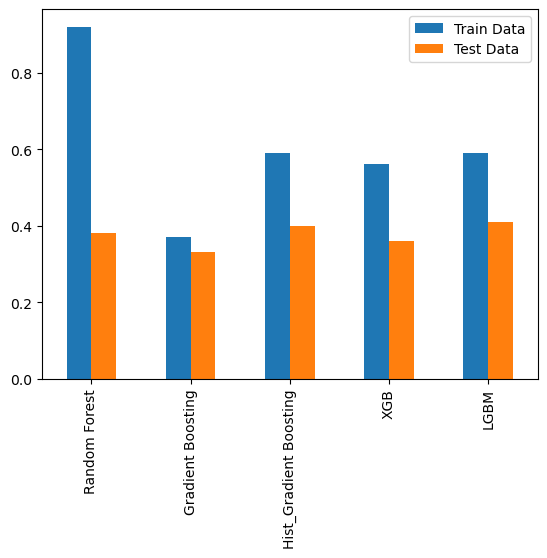

In [125]:
r2_score_hist.plot(kind='bar')